## Install and import the required libraries

In [1]:
# pip install yfinance 

# yfinance is a python library which retrieves real time market value

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import arch
import warnings
import requests
import yfinance as yf

from sklearn.metrics import mean_squared_error
from keras.layers.core import Dense, Activation, Dropout
from keras.models import Sequential
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()
warnings.filterwarnings("ignore")

## Loading Bitcoin value (BTC-USD)

In [5]:
btc = yf.Ticker("BTC-USD")

# get stock info
print(btc.info)

# get historical market data
hist = btc.history(period="5d", interval = "1m")
df = hist.reset_index()
df

{'companyOfficers': [], 'name': 'Bitcoin', 'startDate': 1367107200, 'description': 'Bitcoin (BTC) is a cryptocurrency . Users are able to generate BTC through the process of mining. Bitcoin has a current supply of 18,722,362. The last known price of Bitcoin is 34,811.21481044 USD and is up 2.76 over the last 24 hours. It is currently trading on 9728 active market(s) with $30,285,329,552.01 traded over the last 24 hours. More information can be found at https://bitcoin.org/.', 'maxAge': 1, 'previousClose': 35508.32, 'regularMarketOpen': 35508.32, 'twoHundredDayAverage': 41095.23, 'trailingAnnualDividendYield': None, 'payoutRatio': None, 'volume24Hr': 30267967488, 'regularMarketDayHigh': 35843.113, 'navPrice': None, 'averageDailyVolume10Day': 59606508170, 'totalAssets': None, 'regularMarketPreviousClose': 35508.32, 'fiftyDayAverage': 50988.34, 'trailingAnnualDividendRate': None, 'open': 35508.32, 'toCurrency': 'USD=X', 'averageVolume10days': 59606508170, 'expireDate': None, 'yield': None

,Datetime,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2021-05-27 00:00:00+01:00,39019.730469,39019.730469,39019.730469,39019.730469,0,0,0
1,2021-05-27 00:01:00+01:00,38978.664062,38978.664062,38978.664062,38978.664062,0,0,0
2,2021-05-27 00:02:00+01:00,38937.027344,38937.027344,38937.027344,38937.027344,0,0,0
3,2021-05-27 00:03:00+01:00,38897.214844,38897.214844,38897.214844,38897.214844,0,0,0
4,2021-05-27 00:04:00+01:00,38783.230469,38783.230469,38783.230469,38783.230469,0,0,0
...,...,...,...,...,...,...,...,...
5949,2021-05-31 05:34:00+01:00,34249.679688,34249.679688,34249.679688,34249.679688,0,0,0
5950,2021-05-31 05:35:00+01:00,34312.984375,34312.984375,34312.984375,34312.984375,0,0,0
5951,2021-05-31 05:36:00+01:00,34355.277344,34355.277344,34355.277344,34355.277344,16433152,0,0
5952,2021-05-31 05:37:00+01:00,34374.789062,34374.789062,34374.789062,34374.789062,14221312,0,0


## Data Preprocessing 

In [3]:
# feature creation for better representation of price on a day
df['Mean'] = (df['Low'] + df['High'])/2

# remove NaNs and Nones
df=df.drop(columns=['Dividends','Stock Splits'])

# data preview
print(df.head())

                   Datetime          Open          High           Low  \
0 2021-05-27 00:00:00+01:00  39019.730469  39019.730469  39019.730469   
1 2021-05-27 00:01:00+01:00  38978.664062  38978.664062  38978.664062   
2 2021-05-27 00:02:00+01:00  38937.027344  38937.027344  38937.027344   
3 2021-05-27 00:03:00+01:00  38897.214844  38897.214844  38897.214844   
4 2021-05-27 00:04:00+01:00  38783.230469  38783.230469  38783.230469   

          Close  Volume          Mean  
0  39019.730469       0  39019.730469  
1  38978.664062       0  38978.664062  
2  38937.027344       0  38937.027344  
3  38897.214844       0  38897.214844  
4  38783.230469       0  38783.230469  


In [4]:
# Creating a copy for making small changes
dataset_for_prediction = df.copy()
dataset_for_prediction['Actual']=dataset_for_prediction['Mean'].shift()

# date time typecast
dataset_for_prediction['Datetime'] =pd.to_datetime(dataset_for_prediction['Datetime'])
dataset_for_prediction.index= dataset_for_prediction['Datetime']

## Polynomial Regression

In [18]:
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression
N=5000
#test size
X=[]
for i in range(5000):
    X.append([i])

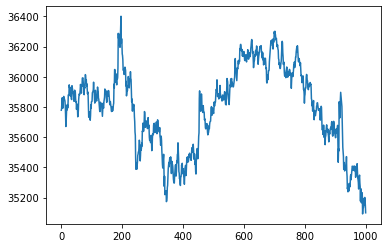

In [25]:
#make numpy array
X=np.array(X)

#make train data
Xtrain=X[:N]
ytrain=Y[:N]

Xtest=X[-1000:]
Y=df["Mean"]
Y=np.array(Y,dtype='float32')
ytrain=Y[:N]

#make test data
ytest=Y[-1000:]
arr=ytest
#plot actual values
plt.plot(arr,label='actual')

POLYNOMIAL REGRESSION
Degree= 2         RMSE: [982.36847]
POLYNOMIAL REGRESSION
Degree= 3         RMSE: [889.1098]
POLYNOMIAL REGRESSION
Degree= 5         RMSE: [932.8214]

POLYNOMIAL REGRESSION, depending upon no of days


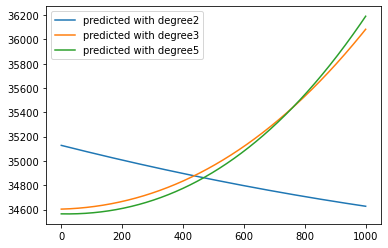

In [27]:

# grid serach for optimal polynomial degree
for j in [2,3,5]:
    #make polynomial features
    poly = PolynomialFeatures(degree = j)
    X_poly = poly.fit_transform(Xtrain.reshape((5000,1))) 


    poly.fit(X_poly, ytrain) 
    reg = LinearRegression() 
    reg.fit(X_poly, ytrain) 

    ypred=reg.predict(poly.fit_transform(Xtest.reshape((1000,1))))
    ytest=ytest.reshape((1000,1))

    #plot the same
    plt.plot(ypred,label='predicted with degree'+str(j))
    plt.legend()
    #plt.show()

    print("POLYNOMIAL REGRESSION")

    c=0
    for i in range(1000):
        c+=(ypred[i]-ytest[i])**2
    c/=1000
    
    print("Degree=",j,"        RMSE:",c**0.5)

print()
print("POLYNOMIAL REGRESSION, depending upon no of days")